<a href="https://colab.research.google.com/github/amrahmani/Machine-Learning/blob/main/Ch9_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Read Kaggle Datasets in Google Colab**


**1. Get Your Kaggle API Token:**

Go to the Kaggle website (https://www.kaggle.com/) and log in to your account. Navigate to your account settings by clicking on your profile picture in the top right corner and selecting "Account." Click on the “Settings” button. Scroll down to the "API" section. Click on the "Create New API Token" button. This will download a file named kaggle.json to your computer. This file contains your Kaggle API credentials.

**2. Upload Your Kaggle API Token to Google Colab:**

Open your Google Colab notebook. In the left sidebar, click on the "Files" icon. Click the "Upload" button. Select the kaggle.json file that you downloaded and upload it to the Colab environment, **or run the following cell.**



In [ ]:
from google.colab import files
files.upload() # This will open a file picker. Select your kaggle.json file.

KeyboardInterrupt: 

**3. Install the Kaggle API Client in Colab:**

In a code cell in your Colab notebook, run the following command to install the Kaggle API client:

In [ ]:
!pip install -q kaggle

**4. Configure the Kaggle API Credentials**:

In a new code cell, run the following commands to create the .kaggle directory and move the kaggle.json file into it with the correct permissions:

In [ ]:
!mkdir -p ~/.kaggle/
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -al

**5. Download the Dataset from Kaggle:**

You need to know the name of the dataset as it appears on Kaggle. This usually follows the format username/dataset-name.
Go to the Kaggle dataset page you want to use. The dataset name is typically found below the dataset title (e.g., vijayuv/onlineretail).
In a new code cell in Colab, use the kaggle datasets download command followed by the dataset name and the -p flag to specify the directory where you want to download the files (e.g., ./data/).

In [ ]:
!kaggle datasets download -d himanshunakrani/iris-dataset -p ./data/
!ls -al ./data/

Dataset URL: https://www.kaggle.com/datasets/himanshunakrani/iris-dataset
License(s): CC0-1.0
  0% 0.00/0.98k [00:00<?, ?B/s]
100% 0.98k/0.98k [00:00<00:00, 3.97MB/s]
total 12
drwxr-xr-x 2 root root 4096 Aug 21 14:23 .
drwxr-xr-x 1 root root 4096 Aug 21 14:23 ..
-rw-r--r-- 1 root root 1006 Jul 20  2022 iris-dataset.zip


**6. Unzip the Dataset (if necessary):**

Most Kaggle datasets are downloaded as zip files. You'll need to unzip them to access the individual data files (like CSV files).

**7. Read the Data into Pandas:**

Once the dataset is unzipped, you can use the pandas library to read the data files (e.g., CSV files) into a DataFrame:

In [ ]:
!unzip ./data/*.zip -d ./data/
!ls -al ./data/

Archive:  ./data/iris-dataset.zip
  inflating: ./data/iris.csv         
total 16
drwxr-xr-x 2 root root 4096 Aug 21 14:24 .
drwxr-xr-x 1 root root 4096 Aug 21 14:23 ..
-rw-r--r-- 1 root root 3858 Jul 20  2022 iris.csv
-rw-r--r-- 1 root root 1006 Jul 20  2022 iris-dataset.zip


# **Problem 1:**  
 Vanilla GAN on MNIST

**Objective:**
 - Load MNIST dataset using torchvision (from Kaggle if needed).
 - Preprocess: normalize images for GAN input.
 - Define Generator (linear layers).
 - Define Discriminator (MLP).
 - Train GAN: alternate updates of generator and discriminator.
 - Visualize generated images during training.
- Evaluate using simple metrics like loss convergence.
- Experiment with latent dimension for variety.


Epoch [1/20] | D Loss: 0.3754 | G Loss: 3.3696
Epoch [2/20] | D Loss: 0.1952 | G Loss: 3.6739
Epoch [3/20] | D Loss: 1.1273 | G Loss: 3.8207
Epoch [4/20] | D Loss: 0.1398 | G Loss: 4.3366
Epoch [5/20] | D Loss: 0.5566 | G Loss: 5.8291
Epoch [6/20] | D Loss: 0.7628 | G Loss: 7.0764
Epoch [7/20] | D Loss: 0.2273 | G Loss: 2.2184
Epoch [8/20] | D Loss: 0.4290 | G Loss: 1.9136
Epoch [9/20] | D Loss: 0.3701 | G Loss: 2.1043
Epoch [10/20] | D Loss: 0.4920 | G Loss: 2.1204


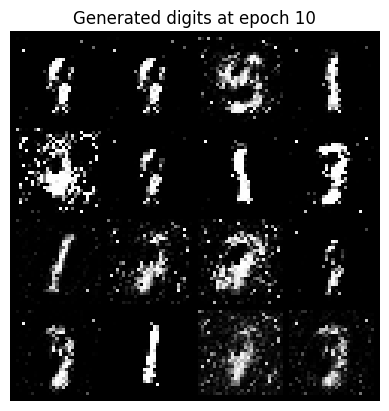

Epoch [11/20] | D Loss: 0.5687 | G Loss: 1.5932
Epoch [12/20] | D Loss: 0.7100 | G Loss: 1.7145
Epoch [13/20] | D Loss: 1.5629 | G Loss: 1.8749
Epoch [14/20] | D Loss: 0.9700 | G Loss: 1.2581
Epoch [15/20] | D Loss: 0.8846 | G Loss: 1.8503
Epoch [16/20] | D Loss: 0.7915 | G Loss: 1.6089
Epoch [17/20] | D Loss: 0.7880 | G Loss: 2.5696
Epoch [18/20] | D Loss: 0.7770 | G Loss: 1.2034
Epoch [19/20] | D Loss: 0.9692 | G Loss: 2.4043
Epoch [20/20] | D Loss: 0.8240 | G Loss: 1.6613


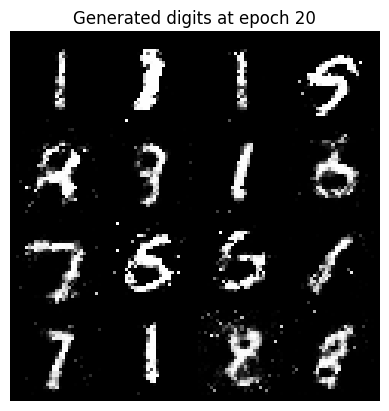

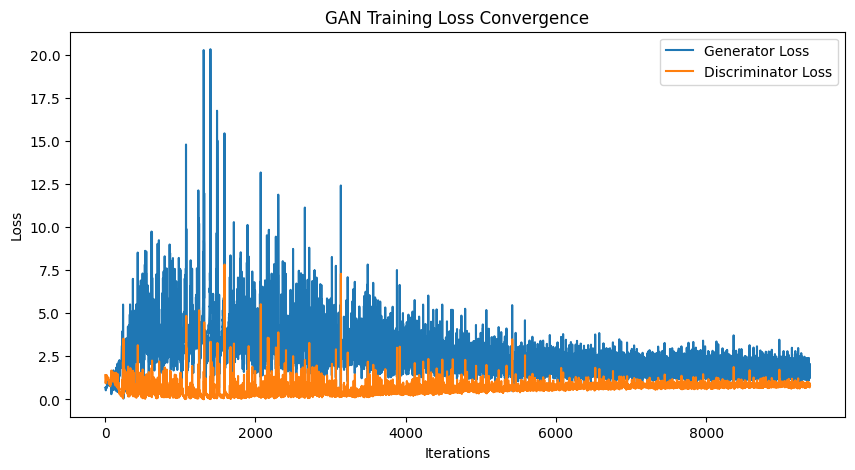

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision # Import torchvision

# -------------------------------
# 1. Hyperparameters
# -------------------------------
latent_dim = 100        # size of noise vector (experiment with 64, 128, etc.)
hidden_dim = 256        # hidden units in MLP
img_size = 28 * 28      # MNIST image size (flattened)
batch_size = 128
lr = 0.0002
num_epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------------
# 2. Data Loading & Preprocessing
# -------------------------------
# MNIST digits, normalized to [-1, 1] for tanh output of generator
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # scale images to [-1,1]
])

train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# -------------------------------
# 3. Define Generator
# -------------------------------
class Generator(nn.Module):
    def __init__(self, latent_dim, img_size, hidden_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(True),
            nn.Linear(hidden_dim * 2, hidden_dim * 4),
            nn.ReLU(True),
            nn.Linear(hidden_dim * 4, img_size),
            nn.Tanh()  # output in [-1,1]
        )

    def forward(self, z):
        img = self.model(z)
        return img

# -------------------------------
# 4. Define Discriminator
# -------------------------------
class Discriminator(nn.Module):
    def __init__(self, img_size, hidden_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(img_size, hidden_dim * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden_dim * 4, hidden_dim * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden_dim * 2, hidden_dim),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()  # output probability
        )

    def forward(self, img):
        validity = self.model(img)
        return validity

# -------------------------------
# 5. Initialize Models & Optimizers
# -------------------------------
generator = Generator(latent_dim, img_size, hidden_dim).to(device)
discriminator = Discriminator(img_size, hidden_dim).to(device)

criterion = nn.BCELoss()  # Binary Cross Entropy loss
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# -------------------------------
# 6. Training Loop
# -------------------------------
g_losses = []
d_losses = []

for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(train_loader):

        # Flatten real images and move to device
        real_imgs = imgs.view(imgs.size(0), -1).to(device)

        # ---------------------
        # Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()

        # Labels: 1 for real, 0 for fake
        real_labels = torch.ones(imgs.size(0), 1).to(device)
        fake_labels = torch.zeros(imgs.size(0), 1).to(device)

        # Discriminator on real images
        real_loss = criterion(discriminator(real_imgs), real_labels)

        # Generate fake images
        z = torch.randn(imgs.size(0), latent_dim).to(device)
        fake_imgs = generator(z)

        # Discriminator on fake images
        fake_loss = criterion(discriminator(fake_imgs.detach()), fake_labels)

        # Total discriminator loss
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # -----------------
        # Train Generator
        # -----------------
        optimizer_G.zero_grad()

        # Generator wants discriminator to output 1 for fakes
        g_loss = criterion(discriminator(fake_imgs), real_labels)

        g_loss.backward()
        optimizer_G.step()

        # Save losses
        g_losses.append(g_loss.item())
        d_losses.append(d_loss.item())

    # Print progress
    print(f"Epoch [{epoch+1}/{num_epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

    # -------------------------------
    # 7. Visualize Generated Images
    # -------------------------------
    if (epoch + 1) % 10 == 0:  # every 10 epochs
        with torch.no_grad():
            z = torch.randn(16, latent_dim).to(device)
            samples = generator(z).view(-1, 1, 28, 28).cpu()
            grid = np.transpose(torchvision.utils.make_grid(samples, nrow=4, normalize=True), (1, 2, 0))
            plt.imshow(grid)
            plt.title(f"Generated digits at epoch {epoch+1}")
            plt.axis("off")
            plt.show()

# -------------------------------
# 8. Plot Loss Convergence
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(g_losses, label="Generator Loss")
plt.plot(d_losses, label="Discriminator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title("GAN Training Loss Convergence")
plt.show()

# **Problem 2**
DCGAN on Fashion MNIST

**Objective:**
 - Load Fashion MNIST dataset using torchvision or pandas.
 - Resize images to 64x64 for convolutional input.
 - Build Generator (ConvTranspose2d + BatchNorm + ReLU).
 - Build Discriminator (Conv2d + LeakyReLU).
 - Train GAN with alternating updates.
 - Plot training losses and generated sample grids.
 - Assess image quality visually and experiment with architecture.


100%|██████████| 26.4M/26.4M [00:01<00:00, 15.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 305kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.89MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 16.1MB/s]


Epoch [1/30] | D Loss: 1.0505 | G Loss: 4.4048
Epoch [2/30] | D Loss: 0.6062 | G Loss: 2.2471
Epoch [3/30] | D Loss: 0.6253 | G Loss: 3.8836
Epoch [4/30] | D Loss: 0.7693 | G Loss: 6.6678
Epoch [5/30] | D Loss: 0.1324 | G Loss: 3.5181


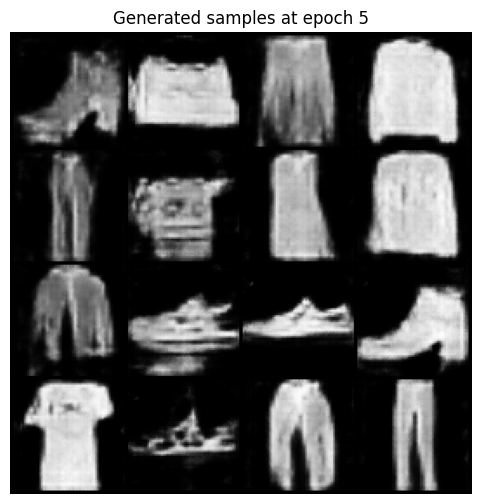

Epoch [6/30] | D Loss: 0.2505 | G Loss: 4.0732
Epoch [7/30] | D Loss: 0.1604 | G Loss: 4.8640
Epoch [8/30] | D Loss: 0.0869 | G Loss: 3.7571
Epoch [9/30] | D Loss: 0.0758 | G Loss: 5.1007
Epoch [10/30] | D Loss: 0.0435 | G Loss: 4.8631


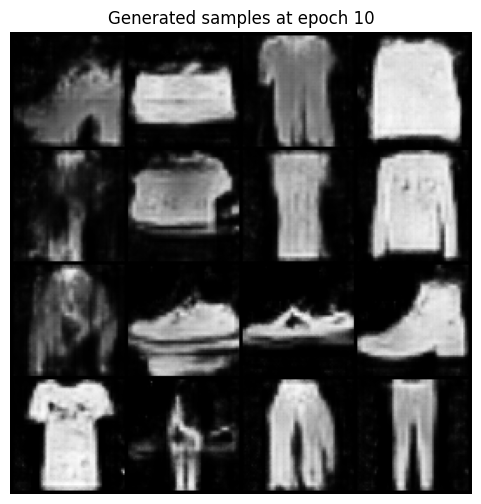

Epoch [11/30] | D Loss: 0.0710 | G Loss: 3.6952
Epoch [12/30] | D Loss: 0.0867 | G Loss: 4.8230
Epoch [13/30] | D Loss: 0.3030 | G Loss: 3.5225
Epoch [14/30] | D Loss: 0.2523 | G Loss: 5.6004
Epoch [15/30] | D Loss: 0.3188 | G Loss: 3.6734


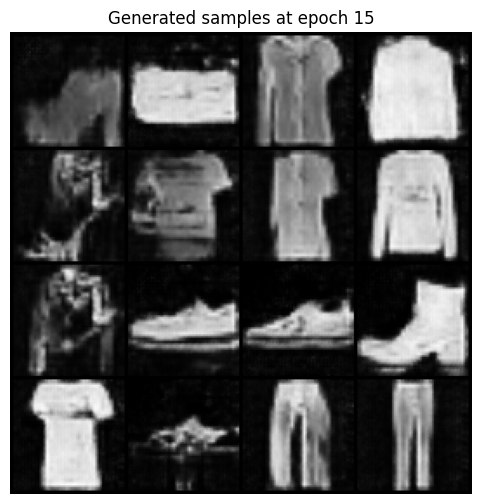

Epoch [16/30] | D Loss: 0.0488 | G Loss: 4.4296
Epoch [17/30] | D Loss: 0.0359 | G Loss: 4.3783
Epoch [18/30] | D Loss: 0.3554 | G Loss: 3.1089
Epoch [19/30] | D Loss: 0.0254 | G Loss: 4.9683


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, utils
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# 1. Hyperparameters
# -------------------------------
latent_dim = 100        # size of latent vector (z)
img_size = 64           # resize Fashion MNIST to 64x64
channels = 1            # Fashion MNIST is grayscale
batch_size = 128
lr = 0.0002
num_epochs = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------------
# 2. Data Loading & Preprocessing
# -------------------------------
transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # scale to [-1,1]
])

train_dataset = datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# -------------------------------
# 3. Define Generator (DCGAN)
# -------------------------------
class Generator(nn.Module):
    def __init__(self, latent_dim, channels):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            # Input: latent vector (z)
            nn.ConvTranspose2d(latent_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            # Output: image with 1 channel (64x64)
            nn.ConvTranspose2d(64, channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# -------------------------------
# 4. Define Discriminator (DCGAN)
# -------------------------------
class Discriminator(nn.Module):
    def __init__(self, channels):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            # Input: 1x64x64
            nn.Conv2d(channels, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            # Flatten and output probability
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img).view(-1, 1)

# -------------------------------
# 5. Initialize Models & Optimizers
# -------------------------------
generator = Generator(latent_dim, channels).to(device)
discriminator = Discriminator(channels).to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Fixed noise for consistent image samples
fixed_noise = torch.randn(16, latent_dim, 1, 1, device=device)

# -------------------------------
# 6. Training Loop
# -------------------------------
g_losses, d_losses = [], []

for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(train_loader):

        real_imgs = imgs.to(device)
        batch_size_cur = real_imgs.size(0)

        # Real and fake labels
        real_labels = torch.ones(batch_size_cur, 1, device=device)
        fake_labels = torch.zeros(batch_size_cur, 1, device=device)

        # ---------------------
        # Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()

        real_loss = criterion(discriminator(real_imgs), real_labels)

        z = torch.randn(batch_size_cur, latent_dim, 1, 1, device=device)
        fake_imgs = generator(z)

        fake_loss = criterion(discriminator(fake_imgs.detach()), fake_labels)

        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # -----------------
        # Train Generator
        # -----------------
        optimizer_G.zero_grad()

        g_loss = criterion(discriminator(fake_imgs), real_labels)
        g_loss.backward()
        optimizer_G.step()

        g_losses.append(g_loss.item())
        d_losses.append(d_loss.item())

    print(f"Epoch [{epoch+1}/{num_epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

    # -------------------------------
    # 7. Visualize Generated Images
    # -------------------------------
    if (epoch + 1) % 5 == 0:
        with torch.no_grad():
            fake_samples = generator(fixed_noise).cpu()
            grid = utils.make_grid(fake_samples, nrow=4, normalize=True)
            plt.figure(figsize=(6,6))
            plt.imshow(np.transpose(grid, (1,2,0)))
            plt.title(f"Generated samples at epoch {epoch+1}")
            plt.axis("off")
            plt.show()

# -------------------------------
# 8. Plot Loss Convergence
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(g_losses, label="Generator Loss")
plt.plot(d_losses, label="Discriminator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title("DCGAN Training Loss Convergence")
plt.show()


# **Problem 3:**
Conditional GAN (cGAN) on CIFAR-10

 **Objective:**
 - Load CIFAR-10 dataset using torchvision datasets (from Kaggle or auto-download).
 - Include class labels as conditioning for Generator and Discriminator.
 - Generator: input = noise + embedded label.
 - Discriminator: input = image + embedded label.
 - Optimize with Adam, monitor losses, and save checkpoints.
 - Display generated samples for each class.
 - Compute FID score for quantitative evaluation.
 - Experiment with varying class conditions.


In [ ]:
!pip install -q torchmetrics torch-fidelity
# !pip install --upgrade torchmetrics torch-fidelity

FID metrics not available. Skipping FID computation.
Starting Training...
Epoch [1/5] Loss_D: 1.3567, Loss_G: 1.0316
Epoch [2/5] Loss_D: 1.3857, Loss_G: 0.8663
Epoch [3/5] Loss_D: 1.3834, Loss_G: 0.7520
Epoch [4/5] Loss_D: 1.3413, Loss_G: 0.7910
Epoch [5/5] Loss_D: 1.4931, Loss_G: 0.7576


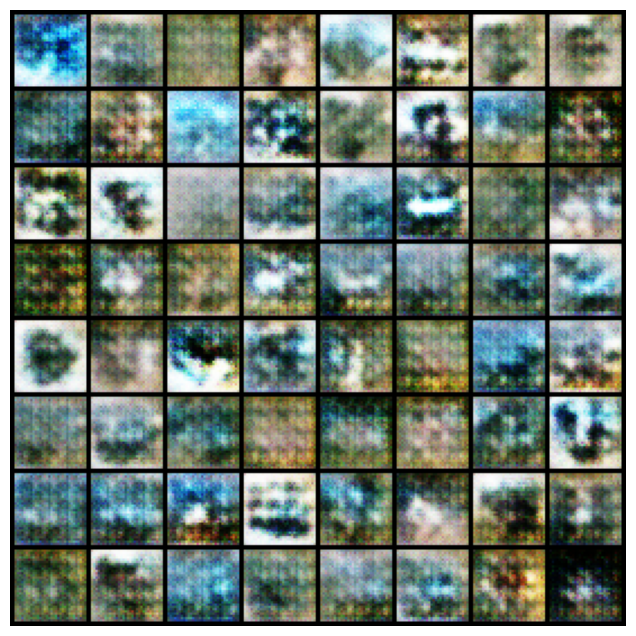

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Device setup
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------------
# CIFAR-10 Dataset with transforms
# -------------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)

num_classes = 10
nz = 100   # latent dimension
lr = 0.0002
epochs = 5

# -------------------------------
# Conditional Generator
# -------------------------------
class Generator(nn.Module):
    def __init__(self, nz, num_classes, img_channels=3, feature_g=64):
        super(Generator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)

        self.net = nn.Sequential(
            nn.ConvTranspose2d(nz + num_classes, feature_g*8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(feature_g*8),
            nn.ReLU(True),
            nn.ConvTranspose2d(feature_g*8, feature_g*4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g*4),
            nn.ReLU(True),
            nn.ConvTranspose2d(feature_g*4, feature_g*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g*2),
            nn.ReLU(True),
            nn.ConvTranspose2d(feature_g*2, img_channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        label_input = self.label_emb(labels)
        gen_input = torch.cat((noise, label_input), -1)
        gen_input = gen_input.unsqueeze(2).unsqueeze(3)
        return self.net(gen_input)

# -------------------------------
# Conditional Discriminator
# -------------------------------
class Discriminator(nn.Module):
    def __init__(self, num_classes, img_channels=3, feature_d=64):
        super(Discriminator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)

        self.net = nn.Sequential(
            nn.Conv2d(img_channels + num_classes, feature_d, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(feature_d, feature_d*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_d*2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(feature_d*2, feature_d*4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_d*4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(feature_d*4, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        label_input = self.label_emb(labels).unsqueeze(2).unsqueeze(3)
        label_input = label_input.expand(-1, -1, img.size(2), img.size(3))
        d_input = torch.cat((img, label_input), 1)
        out = self.net(d_input)
        return out.view(out.size(0), -1)  # flatten to [batch_size, 1]

# -------------------------------
# Initialize models
# -------------------------------
netG = Generator(nz, num_classes).to(device)
netD = Discriminator(num_classes).to(device)

criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(0.5, 0.999))

# -------------------------------
# FID Setup with fallback
# -------------------------------
fid = None
try:
    from torchmetrics.image.fid import FrechetInceptionDistance
    fid = FrechetInceptionDistance(feature=64).to(device)
    print("Using FrechetInceptionDistance")
except Exception:
    try:
        from torchmetrics.image.fid import FID
        fid = FID(feature=64).to(device)
        print("Using FID fallback")
    except Exception:
        print("FID metrics not available. Skipping FID computation.")

# -------------------------------
# Training Loop
# -------------------------------
G_losses, D_losses = [], []

print("Starting Training...")
for epoch in range(epochs):
    for i, (real_imgs, labels) in enumerate(trainloader):
        b_size = real_imgs.size(0)
        real_imgs, labels = real_imgs.to(device), labels.to(device)
        real_labels = torch.ones(b_size, 1, device=device)
        fake_labels = torch.zeros(b_size, 1, device=device)

        # Train Discriminator
        netD.zero_grad()
        output_real = netD(real_imgs, labels)
        lossD_real = criterion(output_real, real_labels)

        noise = torch.randn(b_size, nz, device=device)
        gen_labels = torch.randint(0, num_classes, (b_size,), device=device)
        fake_imgs = netG(noise, gen_labels)
        output_fake = netD(fake_imgs.detach(), gen_labels)
        lossD_fake = criterion(output_fake, fake_labels)

        lossD = lossD_real + lossD_fake
        lossD.backward()
        optimizerD.step()

        # Train Generator
        netG.zero_grad()
        output_fake = netD(fake_imgs, gen_labels)
        lossG = criterion(output_fake, real_labels)
        lossG.backward()
        optimizerG.step()

        G_losses.append(lossG.item())
        D_losses.append(lossD.item())

    print(f"Epoch [{epoch+1}/{epochs}] Loss_D: {lossD.item():.4f}, Loss_G: {lossG.item():.4f}")

    # Update FID if available
    if fid is not None:
        fid.update(real_imgs, real=True)
        fid.update(fake_imgs, real=False)
        try:
            fid_score = fid.compute()
            print(f"FID score: {fid_score.item():.4f}")
        except Exception as e:
            print(f" Could not compute FID this epoch: {e}")

# -------------------------------
# Visualize generated samples
# -------------------------------
def show_images(images, nrow=8):
    grid = torchvision.utils.make_grid(images[:nrow*nrow], nrow=nrow, normalize=True)
    npimg = grid.cpu().numpy()
    plt.figure(figsize=(8, 8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()

# Generate 64 images, one per class repeated
noise = torch.randn(64, nz, device=device)
labels = torch.arange(0, num_classes, device=device).repeat(7)[:64]
fake_imgs = netG(noise, labels)
show_images(fake_imgs)


# **Problem 4:**
GANs in Image Synthesis

Using PyTorch, models train on datasets like CelebA. This creates diverse facial images practically.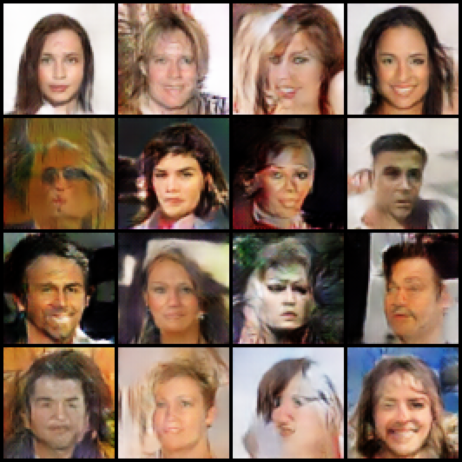

In [ ]:
!kaggle datasets download -d jessicali9530/celeba-dataset -p ./data/
!ls -al ./data/

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
 98% 1.31G/1.33G [00:17<00:00, 279MB/s]
100% 1.33G/1.33G [00:17<00:00, 81.9MB/s]
total 1394304
drwxr-xr-x 2 root root       4096 Sep  2 01:02 .
drwxr-xr-x 1 root root       4096 Sep  2 01:02 ..
-rw-r--r-- 1 root root 1427750792 Oct  1  2019 celeba-dataset.zip


In [ ]:
!unzip ./data/*.zip -d ./data/
# !ls -al ./data/

Archive:  ./data/celeba-dataset.zip
replace ./data/img_align_celeba/img_align_celeba/000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./data/img_align_celeba/img_align_celeba/000002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
# DCGAN-like training on CelebA images stored in:
# ./data/img_align_celeba/img_align_celeba/*.jpg
# Works in Google Colab. Tested structure: provided list_attr_celeba.csv etc.
# Run with GPU runtime for best speed.

import os
import random
from glob import glob # find pathnames matching a specified pattern
from tqdm import tqdm # the progress bar you see when a file is downloading

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt

# ----------------------
# CONFIG
# ----------------------
DATA_DIR = "./data/img_align_celeba/img_align_celeba"  # path to folder with images
OUT_DIR = "./outputs"
os.makedirs(OUT_DIR, exist_ok=True)

SEED = 42
random.seed(SEED)
torch.manual_seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Hyperparams
image_size = 64         # output size (64x64)
batch_size = 128
latent_dim = 100
num_epochs = 8
lr = 2e-4
beta1 = 0.5
num_workers = 2
save_every = 1          # save sample grid every `save_every` epochs
drop_last = True

# ----------------------
# Custom Dataset (single folder of images)
# ----------------------
class SingleFolderImageDataset(Dataset):
    def __init__(self, folder, transform=None, extensions=("jpg", "jpeg", "png")):
        self.files = []
        for ext in extensions:
            self.files += glob(os.path.join(folder, f"*.{ext}"))
        self.files = sorted(self.files)
        if len(self.files) == 0:
            raise RuntimeError(f"No images found in {folder} with extensions: {extensions}")
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        path = self.files[idx]
        img = Image.open(path).convert("RGB")
        if self.transform is not None:
            img = self.transform(img)
        return img

# ----------------------
# Transforms
# ----------------------
transform = transforms.Compose([
    transforms.CenterCrop(178),           # CelebA images are 178x218
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),  # map to [-1,1]
])

dataset = SingleFolderImageDataset(DATA_DIR, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True,
                        num_workers=num_workers, pin_memory=True, drop_last=drop_last)

# ----------------------
# Model definitions (DCGAN-like)
# ----------------------
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1 or classname.find('ConvTranspose') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        if getattr(m, "bias", None) is not None:
            nn.init.zeros_(m.bias.data)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.zeros_(m.bias.data)
    elif classname.find("Linear") != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        if getattr(m, "bias", None) is not None:
            nn.init.zeros_(m.bias.data)

class Generator(nn.Module):
    def __init__(self, z_dim=latent_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim, 256 * 8 * 8, bias=True),
            nn.ReLU(inplace=True),
            nn.Unflatten(1, (256, 8, 8)),  # (N,256,8,8)
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),  # 8->16
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),   # 16->32
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 32, 4, 2, 1, bias=False),    # 32->64
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            # final conv to 3 channels (keep size)
            nn.Conv2d(32, 3, 3, 1, 1, bias=True),
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 32, 4, 2, 1, bias=True),   # 64->32
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(32, 64, 4, 2, 1, bias=False), # 32->16
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),# 16->8
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),# 8->4
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 1, bias=True)   # logits (no sigmoid)
        )

    def forward(self, img):
        return self.net(img).view(-1, 1)

# ----------------------
# Setup
# ----------------------
G = Generator().to(device)
D = Discriminator().to(device)
G.apply(weights_init)
D.apply(weights_init)

criterion = nn.BCEWithLogitsLoss()   # stable combination with logits from D
optG = optim.Adam(G.parameters(), lr=lr, betas=(beta1, 0.999))
optD = optim.Adam(D.parameters(), lr=lr, betas=(beta1, 0.999))

fixed_z = torch.randn(16, latent_dim, device=device)

# Utility to save image grid
def save_grid(tensor, path, nrow=4):
    grid = torchvision.utils.make_grid((tensor + 1) / 2, nrow=nrow, normalize=False)  # map to [0,1]
    ndarr = grid.permute(1, 2, 0).cpu().numpy()
    plt.figure(figsize=(6,6))
    plt.axis('off')
    plt.imshow(ndarr)
    plt.savefig(path, bbox_inches='tight', pad_inches=0)
    plt.close()

# Label helpers
def real_labels(size, device=device, smooth=0.0):
    return torch.full((size,1), 1.0 - smooth, device=device)
def fake_labels(size, device=device):
    return torch.zeros((size,1), device=device)

# ----------------------
# Training loop
# ----------------------
def train():
    print("Starting training. Dataset size:", len(dataset))
    for epoch in range(1, num_epochs + 1):
        prog = tqdm(enumerate(dataloader), total=len(dataloader), desc=f"Epoch {epoch}/{num_epochs}")
        for i, real_imgs in prog:
            real_imgs = real_imgs.to(device, non_blocking=True)
            bsz = real_imgs.size(0)

            # ---- Train Discriminator ----
            D.zero_grad(set_to_none=True)
            logits_real = D(real_imgs)
            labels_real = real_labels(bsz, device=device, smooth=0.0)
            d_loss_real = criterion(logits_real, labels_real)

            z = torch.randn(bsz, latent_dim, device=device)
            fake_imgs = G(z)
            logits_fake = D(fake_imgs.detach())
            labels_fake = fake_labels(bsz, device=device)
            d_loss_fake = criterion(logits_fake, labels_fake)

            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            optD.step()

            # ---- Train Generator ----
            G.zero_grad(set_to_none=True)
            logits_fake_for_g = D(fake_imgs)
            g_loss = criterion(logits_fake_for_g, labels_real)  # trick D to predict real
            g_loss.backward()
            optG.step()

            if (i % 100) == 0:
                prog.set_postfix(D_loss=f"{d_loss.item():.4f}", G_loss=f"{g_loss.item():.4f}")

        # Save sample grid each epoch
        if epoch % save_every == 0:
            with torch.no_grad():
                samples = G(fixed_z)
                save_grid(samples, os.path.join(OUT_DIR, f"sample_epoch_{epoch:03d}.png"), nrow=4)

        # Optional: save checkpoints
        torch.save({
            "epoch": epoch,
            "G_state": G.state_dict(),
            "D_state": D.state_dict(),
            "optG": optG.state_dict(),
            "optD": optD.state_dict()
        }, os.path.join(OUT_DIR, f"checkpoint_epoch_{epoch:03d}.pt"))

    print("Training finished. Final samples saved to", OUT_DIR)

# ----------------------
# Run (safeguard for dataloader worker spawn)
# ----------------------
if __name__ == "__main__":
    train()

Device: cuda
Starting training. Dataset size: 202599


Epoch 8/8: 100%|██████████| 1582/1582 [03:01<00:00,  8.72it/s, D_loss=0.9580, G_loss=1.0553]


Training finished. Final samples saved to ./outputs


**Practice:**

**Task 1:**
For Problem 1
- Change latent dimension (50, 200) and compare generated digit diversity.
- Modify hidden layer size and observe convergence speed.

**Task 2:**
For Problem 2
- Reduce generator layers and check quality of apparel images.
- Increase batch size to 256 and monitor training stability.
- Compare generated shoes vs shirts by conditioning on labels.

**Task 3:**
For Problem 3
- Generate images for a single class (e.g., “dog”).
- Replace embedding dimension (50 vs 200) and observe outputs.